In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
artistdf = pd.read_csv("Resources/Artistfile.csv")
artistdf.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock


In [4]:
trackdf = pd.read_csv("Resources/Trackfile.csv")
trackdf.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


In [5]:
# Adding a column of just the release year
dates = trackdf["Release Date"]
trackdf["Release Year"] = dates.apply(lambda x: int(x.split("-",1)[0]))
trackdf.head()


,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release Year
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171,1969
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,1969
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462,1970
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529,1965
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207,2000


In [6]:
plt.style.use("bmh")


<IPython.core.display.Javascript object>


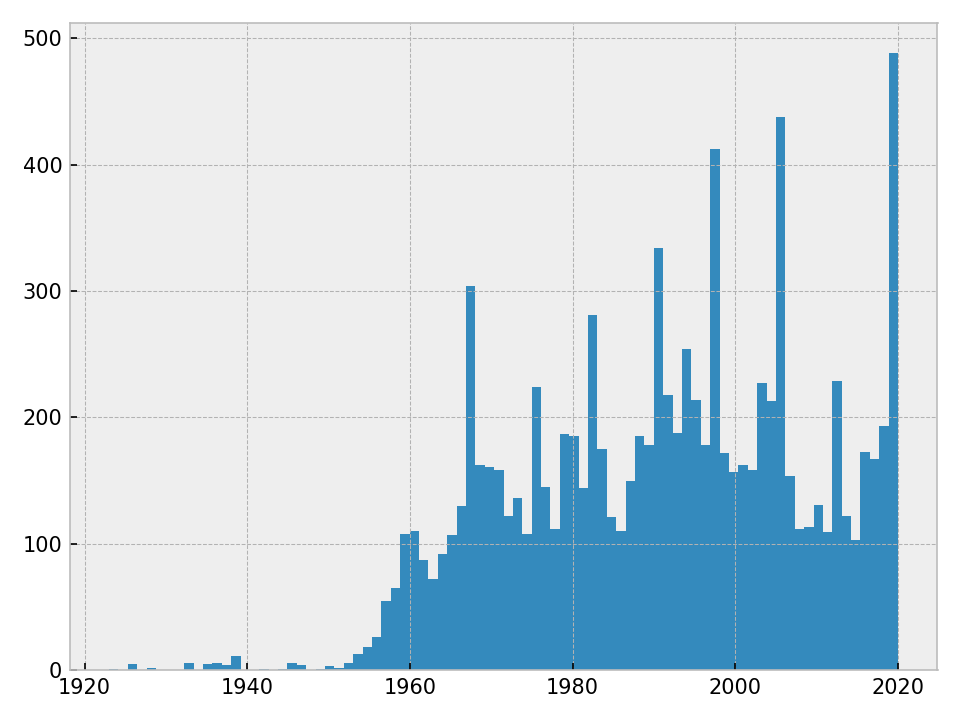

In [10]:

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.hist(trackdf["Release Year"], bins=len(trackdf["Release Year"].unique()))
plt.show()


<IPython.core.display.Javascript object>


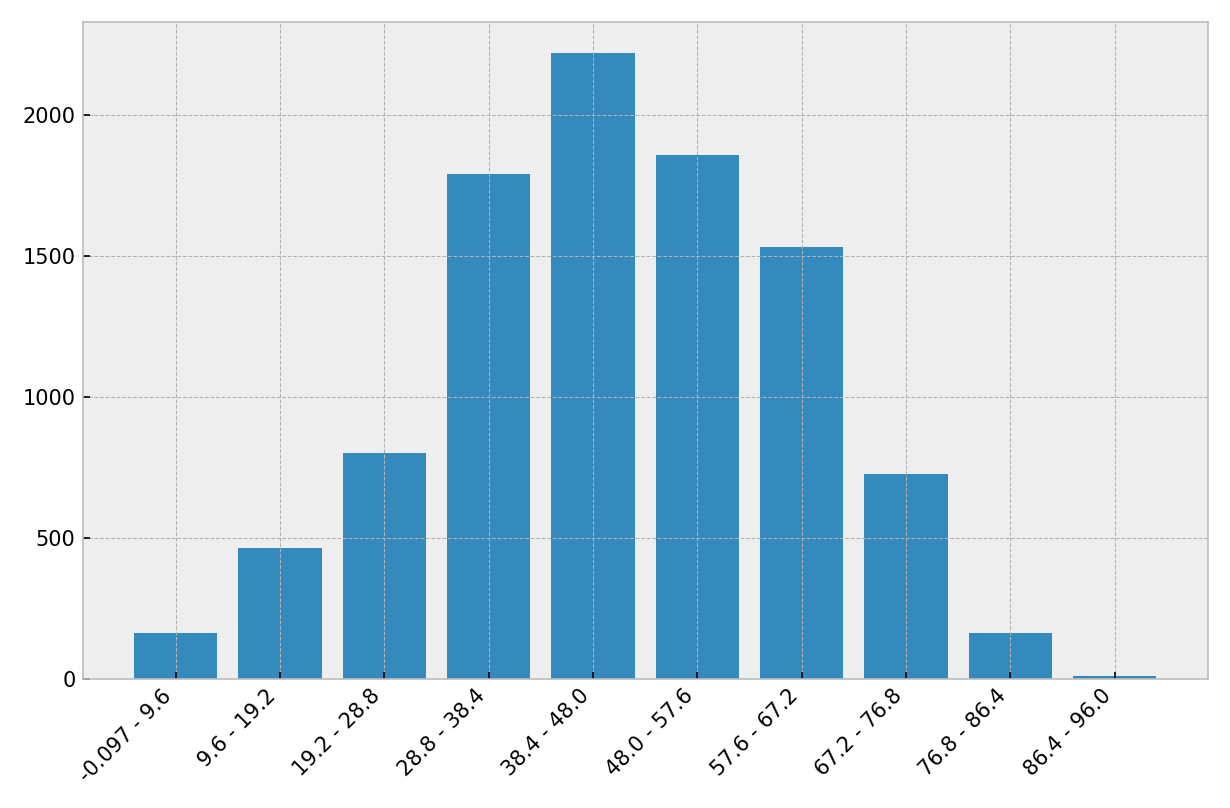

In [11]:
#popcats = pd.qcut(trackdf["Popularity"], 4)
popbins = trackdf["Popularity"].value_counts(bins=10, ascending=True, sort=False)
popb_names = [f"{x.left} - {x.right}" for x in popbins.index]
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.bar(popb_names, popbins)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")


plt.show()

In [19]:
def releaseyear_line(col):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    ax.plot(trackdf.groupby("Release Year")[col].mean().index, trackdf.groupby("Release Year")[col].mean())
    ax.set_title(f"Average {col} Over Time")
    ax.set_ylabel(col)
    ax.set_xlabel("Release Year")




<IPython.core.display.Javascript object>


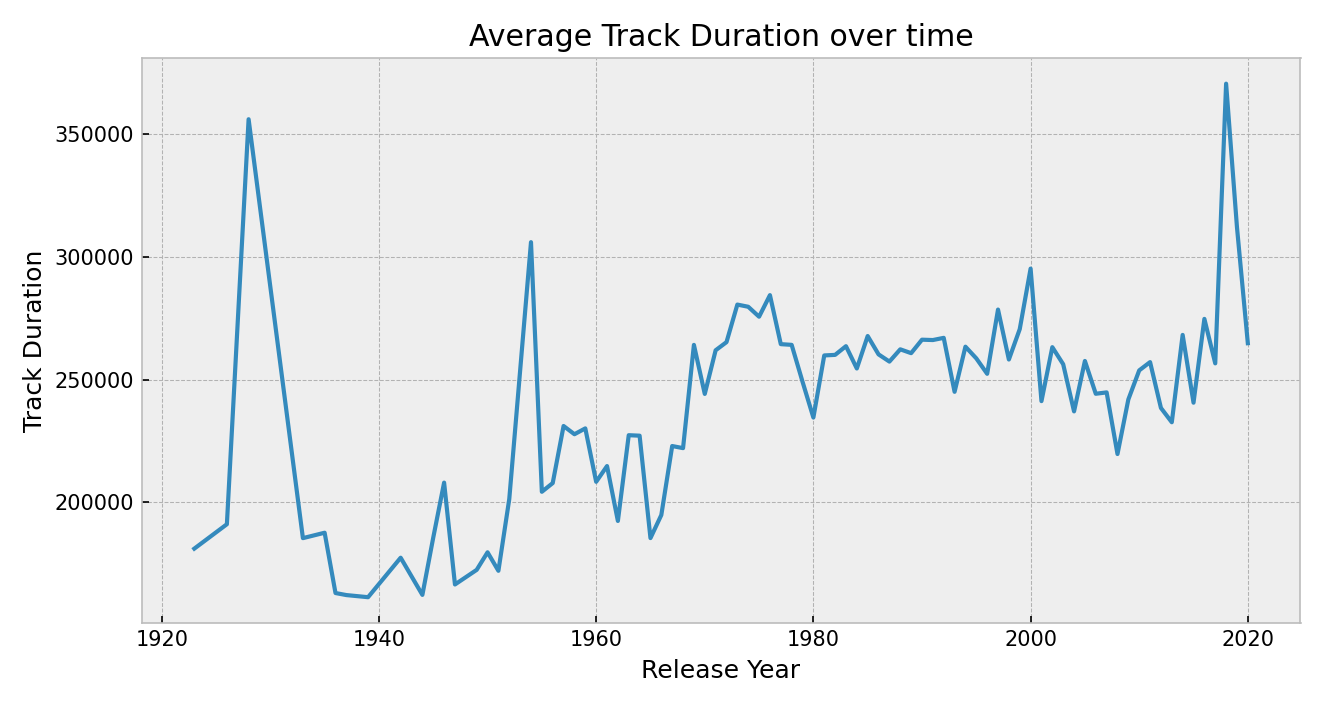

In [20]:
releaseyear_line("Track Duration")